# Trending UK Youtube Video Analysis (Changes according to recent coding review)

We are going to find the best model that would predict how many views a youtube video would get.

## Info about dataset

- info about data:
    - GBvideos.csv
    - GB_category_id.json

Youtube maintains a list of top trending videos on the platform (up to 200 listed trending videos per day) and the dataset was collected from this through the Youtube API. The dataset inlcudes several months of data on daily trending Youtube videos mainly between 2017/2018 (A few anomalies where videos come from 2014/2015) where each row just includes one video. 

## Import Packages

Here we import some packages that are going to help us analyze data. 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime 
import json 

### Reading the dataset

In [2]:
df = pd.read_csv("/Users/Alex/Youtube Dataset/GBvideos.csv")

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.0+ MB


In [5]:
cols_with_missing_values = [col for col in df.columns
                    if df[col].isnull().any()]

print(cols_with_missing_values)

['description']


From here we can see that there 38,916 entries in this dataset. All the columns have no null values apart from the description column (This has some null values since ot only has 38304 non-null values instead of 38,916) 

In [6]:
# Convert publish time object to a dataframe 
df['publish_time'] = pd.to_datetime(df['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

In [7]:
# Getting months video was published in
df['publish_month'] = df["publish_time"].dt.month 

In [8]:
# Convert trending date to datetime
df['trending_date'] = pd.to_datetime(df['trending_date'],format = '%y.%d.%m')
df['trending_month'] = df['trending_date'].dt.month

## Analysing the Categories

The category_id is a categorical nominal variable

In [9]:
print("There are", df['category_id'].nunique(),"unique categories")

There are 16 unique categories


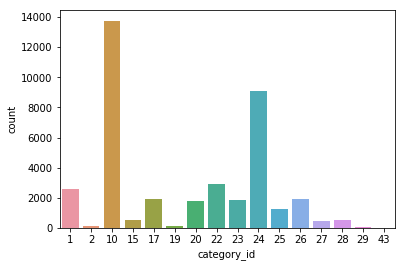

In [10]:
sns.countplot(x=df['category_id'])

In [11]:
with open('/Users/Alex/Youtube Dataset/GB_category_id.json') as f:
    categories = json.load(f)["items"]

# my initial code
#cat_dict = {}
#for cat in categories:
#    cat_dict[int(cat['id'])] = cat["snippet"]["title"]
#df['category_name'] = df['category_id'].map(cat_dict)

# updated code as dict comprehension, better code style
cat_dict = {int(cat['id']): cat["snippet"]["title"] for cat in categories}
df['category_name'] = df['category_id'].map(cat_dict)

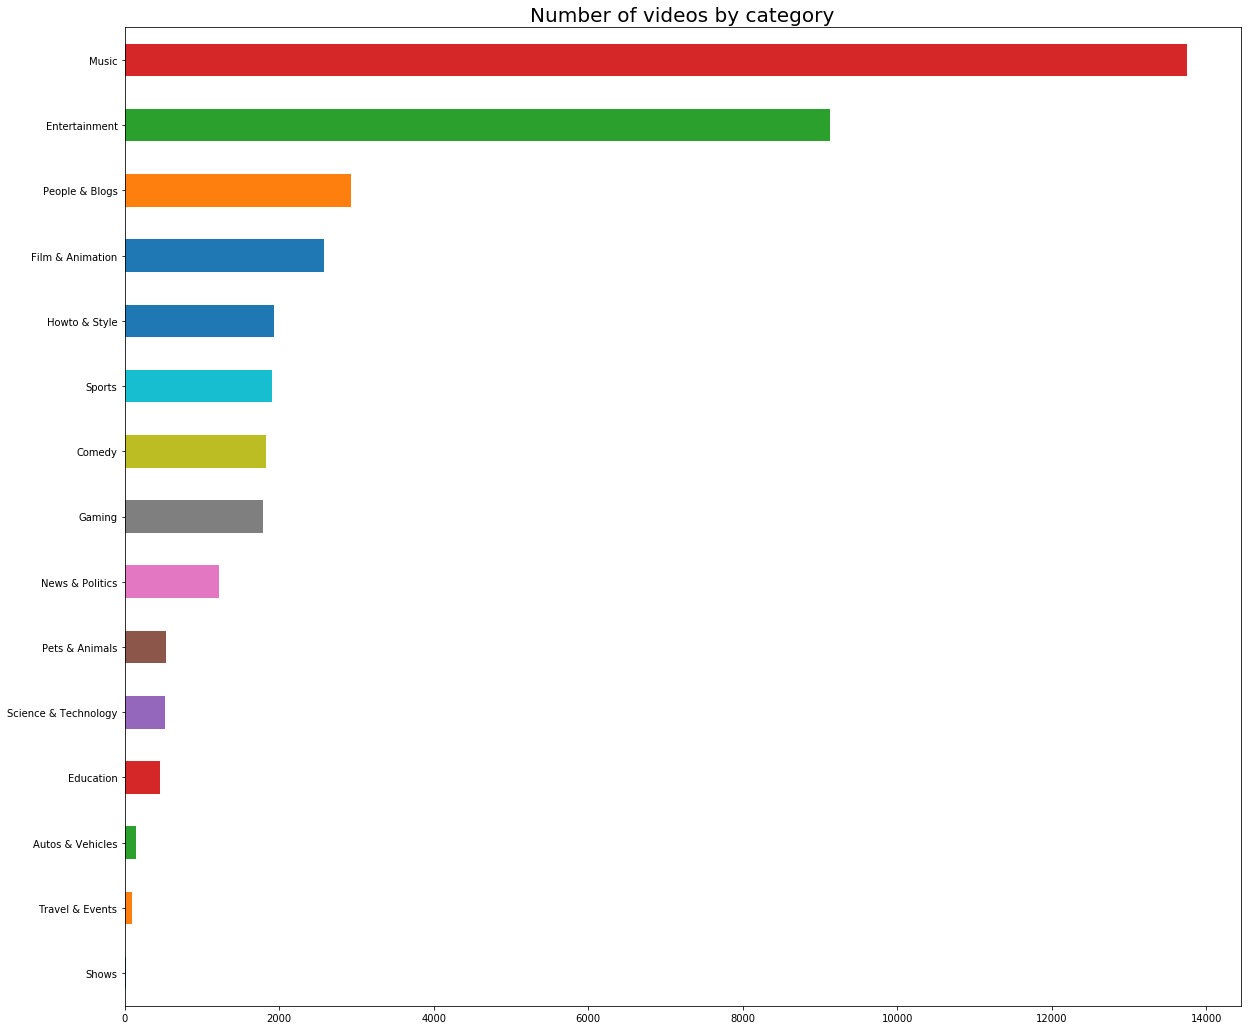

In [12]:
df['category_name'].value_counts().sort_values().plot(kind='barh', figsize=(20,18))
_ = plt.title("Number of videos by category", size=20)
_ = plt.show()

In [13]:
df.category_name.value_counts()

Music                   13754
Entertainment            9124
People & Blogs           2926
Film & Animation         2577
Howto & Style            1928
Sports                   1907
Comedy                   1828
Gaming                   1788
News & Politics          1225
Pets & Animals            534
Science & Technology      518
Education                 457
Autos & Vehicles          144
Travel & Events            96
Shows                      20
Name: category_name, dtype: int64

Since Category_id is Categorical Nominal meaning the values can represent categories that are equally meaningful. We can prevent multicollinearity (This is where more than 2 explanatory variables are highly linearly related) for our linear regression model by using the 'drop_first' method. 

To encode categorical variables, a One-hot-encoder returns a vector for each unique value of the categorical column. So each vector contains only one '1' while other values in the vector are '0'. 'pd.get_dummies' returns a new dataframe that contains one-hot-encoded columns (In this case, not all columns are encoded since they would be non-categorical columns)

In [14]:
categories = pd.get_dummies(df['category_id'], drop_first=True)
categories.head()

,2,10,15,17,19,20,22,23,24,25,26,27,28,29,43
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Data Cleaning

As the description column has some null values. Here we view the rows whose description values are null (null values are denoted by NaN)

In [15]:
df[pd.isnull(df.description)].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_month,trending_month,category_name
91,_wM_jY_rass,2017-11-14,Bone on Labour HQ,Ross Kempsell,25,2017-11-06 16:12:58,[none],159065,1160,1164,0,https://i.ytimg.com/vi/_wM_jY_rass/default.jpg,True,False,False,NaN,11,11,News & Politics
118,8HON4AswPVk,2017-11-14,Arvo Pärt - Tabula Rasa,JSaxofone,10,2012-09-13 12:35:46,"Arvo|""Pärt""|""Tabula""|""Rasa""|""part""|""violin""|""c...",728177,4007,71,240,https://i.ytimg.com/vi/8HON4AswPVk/default.jpg,False,False,False,NaN,9,11,Music
187,j5AILysDDTI,2017-11-14,Brad Bufanda Demo Reel,EinsteinEnt,24,2010-09-02 20:48:37,Brad Bufanda (Film Actor),154054,16,10,19,https://i.ytimg.com/vi/j5AILysDDTI/default.jpg,False,False,False,NaN,9,11,Entertainment
309,_wM_jY_rass,2017-11-15,Bone on Labour HQ,Ross Kempsell,25,2017-11-06 16:12:58,[none],160381,1168,1170,0,https://i.ytimg.com/vi/_wM_jY_rass/default.jpg,True,False,False,NaN,11,11,News & Politics
336,8HON4AswPVk,2017-11-15,Arvo Pärt - Tabula Rasa,JSaxofone,10,2012-09-13 12:35:46,"Arvo|""Pärt""|""Tabula""|""Rasa""|""part""|""violin""|""c...",729358,4016,71,240,https://i.ytimg.com/vi/8HON4AswPVk/default.jpg,False,False,False,NaN,9,11,Music


Now we need to some data cleaning and get rid off the null values, we can replace the null values with an empty string in the description column. 

In [16]:
df["description"] = df["description"].fillna(value="")

There are some videos that have an error/been removed. I prefer to filter our data on unremoved videos. 

In [17]:
df['video_error_or_removed'].value_counts()

False    38847
True        69
Name: video_error_or_removed, dtype: int64

In [18]:
df = df[df['video_error_or_removed']==False]

There are some videos where its rating is disabled and this wouldn't be useful for our prediction as we are predicting the number of likes for a video. 

In [19]:
df['ratings_disabled'].value_counts()

False    38575
True       272
Name: ratings_disabled, dtype: int64

In [20]:
df = df[df['ratings_disabled']==False]

In [21]:
print (df.isnull().values.any())

True


## Predicting the amount of likes for a video

Here we are going to create a Logistic Regression Model. First we will try and pick out the most useful parameters to predict how many likes a video will get. So the parameters I will be picking are the comments, views, dislikes and category_id

In [22]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'publish_month',
       'trending_month', 'category_name'],
      dtype='object')

In [23]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_month,trending_month,category_name
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,11,11,Howto & Style
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,11,11,Entertainment
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,11,11,Music
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13 02:30:38,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,11,11,Sports
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,11,11,News & Politics


In [24]:
df.describe()

,category_id,views,likes,dislikes,comment_count,publish_month,trending_month
count,38575.000000,3.857500e+04,3.857500e+04,3.857500e+04,3.857500e+04,38575.000000,38575.000000
mean,16.866986,5.882495e+06,1.353424e+05,7.641449e+03,1.317013e+04,5.387375,5.242800
std,7.716194,1.899995e+07,3.511111e+05,5.114406e+04,5.086397e+04,4.128724,3.921172
min,1.000000,8.510000e+02,2.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,10.000000,2.509305e+05,6.088000e+03,2.080000e+02,6.950000e+02,2.000000,2.000000
50%,20.000000,9.724450e+05,2.555200e+04,8.330000e+02,2.517000e+03,4.000000,4.000000
75%,24.000000,3.701928e+06,1.151700e+05,3.398500e+03,9.325500e+03,11.000000,6.000000
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,12.000000,12.000000


In [25]:
x = df[["comment_count","views","dislikes",'category_id','trending_month']]
y = df["likes"]
y1 = df[["likes"]]

But just before we fit the model, I want to look at the distribution of the parameter. 

C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


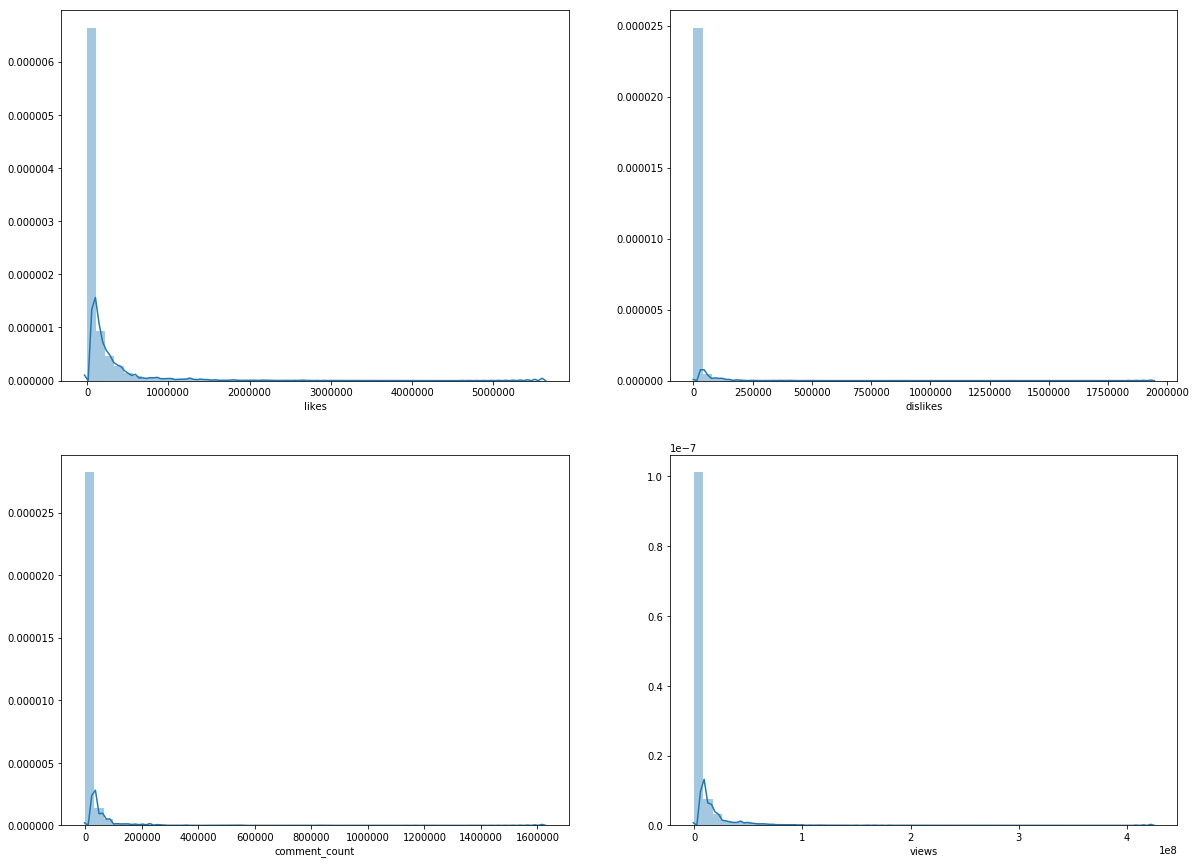

In [26]:
f, ax = plt.subplots(2,2, figsize=(20,15))

g = sns.distplot(df['likes'],ax=ax[0][0])

g1 = sns.distplot(df['dislikes'],ax=ax[0][1])

g2 = sns.distplot(df['comment_count'],ax=ax[1][0])

g3 = sns.distplot(df['views'],ax=ax[1][1])

But looking at the data for each parameter, the data is very skewed and unbalanced which can lead to biases during the predictions. So we want to make this balanced.

### Prior Data Cleaning Before Transforming Graphs

As the dislikes, comment counts and likes parameters contain infinite values or negative (we removed the NaN values earlier), we have to replace this before log transforming the values as otherwise, we would run into an error. So we just converted the values to 1. 

In [27]:
replaced = x.replace([np.inf, np.NaN, -1, 0], 1)
replaced1 = y1.replace([np.inf, np.NaN, -1, 0], 1)

C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


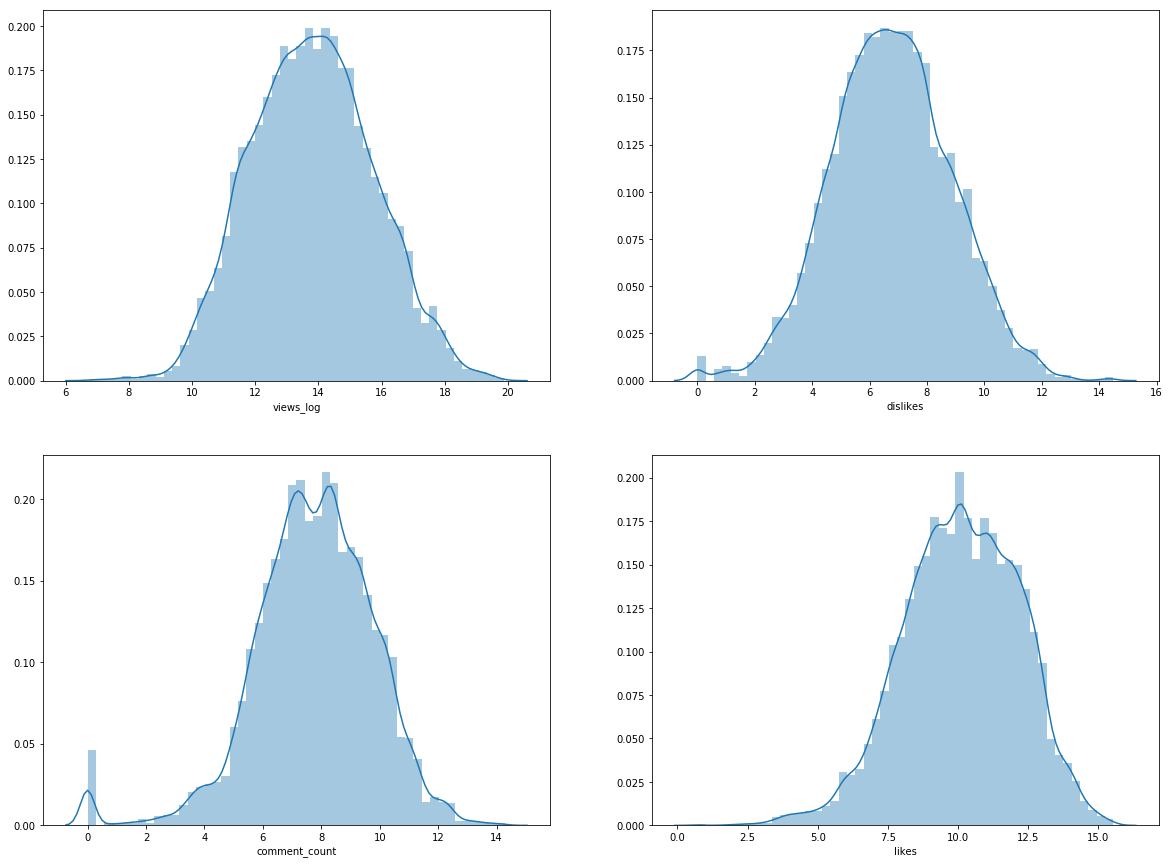

In [28]:
f, ax = plt.subplots(2,2, figsize=(20,15))

df["views_log"] = np.log(df["views"])
g = sns.distplot(df['views_log'],ax=ax[0][0])

g1 =sns.distplot(np.log(replaced.dislikes),ax=ax[0][1])

g2 =sns.distplot(np.log(replaced.comment_count),ax=ax[1][0])

g3 = sns.distplot(np.log(replaced1.likes), ax=ax[1][1])

By log transforming each parameter, we were able to create a bell shaped curve meaning the data is more balanced now. 

In [29]:
df['views_log'] = np.log(df['views'])
df['likes_log'] = np.log(df['likes'])
df['dislikes_log'] = np.log(df['dislikes'])
df['comment_count_log'] = np.log(df['comment_count'])

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


### Creating a Linear Regression Model 

Before creating the model, we have to split the data we are testing first into 2 categories: a training set and a test set. I allocated 30% of the data into the test data and 70% to the training set. A good MAE baseline would be around 10,000-11,000

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

Here we fit the Linear Regression model with the training data

In [31]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model_fit = linreg.fit(X_train, y_train)

Here a one unit increase in the predictor variable (likes) is associated with the change of one coefficient per category (comment_count, views, dislikes and category_id)

In [32]:
X_train.columns

Index(['comment_count', 'views', 'dislikes', 'category_id', 'trending_month'], dtype='object')

In [33]:
cdf = pd.DataFrame(linreg.coef_, index = X_train.columns,columns=['Coefficients'])

In [34]:
cdf 
# Here its clear that the category of video has a large impact on the amount of likes a video 
# can get with the trending_month having the 2nd largest impact. 

,Coefficients
comment_count,5.221465
views,0.010292
dislikes,-2.206645
category_id,-2126.811573
trending_month,-25.218058


Now once we have fit the model, we can apply it to the new data (test data) to make predictions and we will draw a line of best. 

In [35]:
predictions = linreg.predict(X_test)

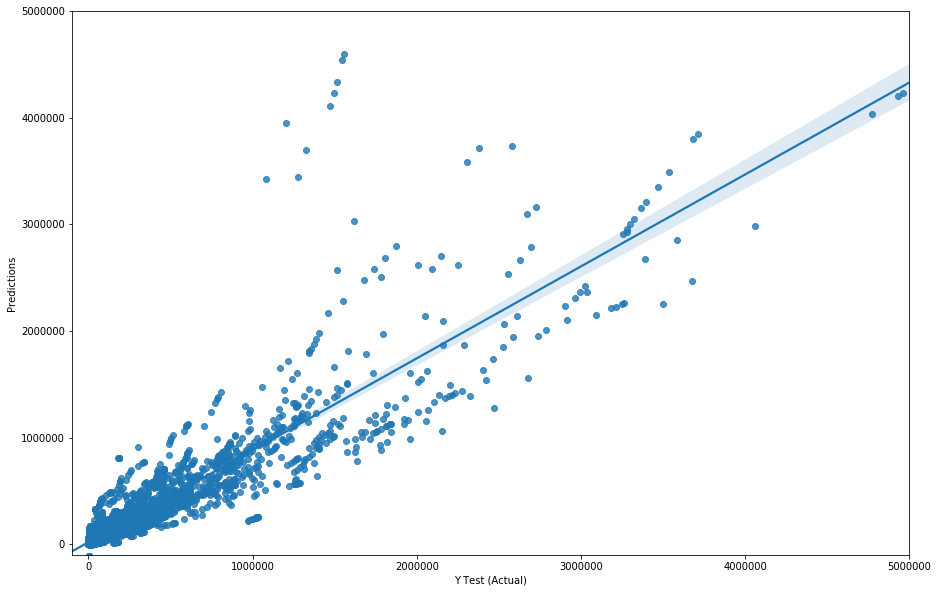

In [36]:
plt.figure(figsize=(15,10))
g = sns.regplot(y_test, predictions, fit_reg=True)
plt.xlabel('Y Test (Actual)')
plt.ylabel('Predictions')
g.set(xlim=(-100000, 5000000),ylim=(-100000, 5000000))
plt.show(g)

residual = observed value - predicted value. 
We will plot the residual values. Positive values for the residuals(y-axis) means the predication was too low and the negative residual values means the prediction was too high

In [37]:
residuals = (y_test - predictions)
print(residuals)

3943      -3240.790539
27790   -186543.635180
2445      18675.893484
3555     -81503.898189
10950    -11700.185425
23810    -10959.119450
14877    -27004.731098
15003      6525.579798
35753    -57484.245801
7157     -20446.261850
10477    -37586.728409
29497     -3849.433624
25806    -15520.850566
33925     55433.352648
37471     -8191.326513
14748     18369.247392
1476      13737.689233
29699     26168.347608
20386     -3773.555078
23717    -28086.568998
30608     68477.090006
2095      25073.236189
35088     -4703.344973
29384    125812.024220
16406     35162.567913
15405    -35259.786792
6953     -34356.261478
1753      25112.285893
9080      59438.880132
16275     -4356.678623
             ...      
19843    -36199.549647
2743      13942.768163
27266    711667.938888
22408    -13065.781318
26272    -28152.354092
36641     29888.814662
7580      -7998.732361
4262     -23976.967535
748      -35347.150935
21965    -14260.823049
14254    -37026.999224
22717    -14114.215408
35712    -2

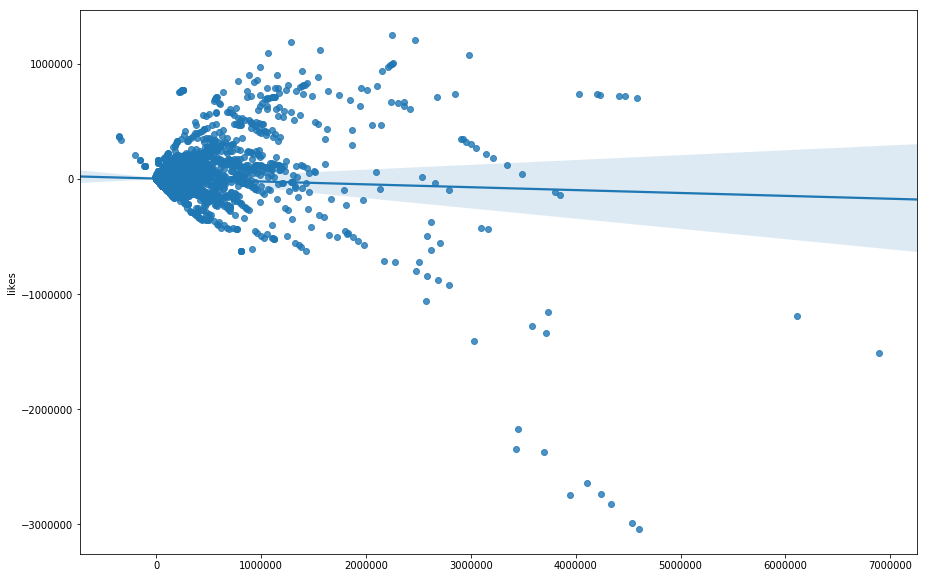

In [38]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y=residuals, fit_reg=True)

In [39]:
from sklearn import metrics 

In [40]:
linreg.score(X_test, y_test)

0.8400046666725429

In [41]:
print('MAE :', metrics.mean_absolute_error(y_test,predictions))

MAE : 51553.662574385664


Looking at the MAE score, this is way off the baseline. So maybe a linear regression model is not the most suitable. 

In [42]:
d1 = {'True Labels' : y_test, 'Predicted Labels' : predictions}
labels = pd.DataFrame(data = d1)
print(labels)

       True Labels  Predicted Labels
3943         57204      60444.790539
27790       379718     566261.635180
2445         45182      26506.106516
3555         25227     106730.898189
10950         4078      15778.185425
23810         1901      12860.119450
14877         1064      28068.731098
15003        81676      75150.420202
35753         3661      61145.245801
7157          4419      24865.261850
10477         7670      45256.728409
29497       130926     134775.433624
25806         7269      22789.850566
33925       233025     177591.647352
37471         2752      10943.326513
14748         8826      -9543.247392
1476         36683      22945.310767
29699       399664     373495.652392
20386         6398      10171.555078
23717        59989      88075.568998
30608       188950     120472.909994
2095         37831      12757.763811
35088        18060      22763.344973
29384       817732     691919.975780
16406        91619      56456.432087
15405        36138      71397.786792
6

## Using a Random Forest 

In [43]:
# Understand why model has much lower score compared to linear regression model 
# estimators are small decision trees which each produce their own predictions, generally the higher number 
# of trees the better to learn the data. However, adding loads of trees can slow down training process. 
# The random forest's ensemble design allows the random forest to 
# generalize well to unseen data, including data with missing values. Random forests are also good 
# at handling large datasets with high dimensionality and heterogeneous feature types (for example, 
# if one column is categorical and another is numerical).--> Believe thats why it performs much better.(numerical->Likes, categorical->Categorys alongside other data like views(numerical))
# However in contrast to linear regression, a random forest regressor is unable to make predictions outside range of its training data. 

from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor(n_estimators=200, max_depth = 40)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('MAE :', metrics.mean_absolute_error(y_test, y_pred))

MAE : 10705.548973954154


Here the MAE for the Random Forest model is considerably lower compared to the MAE for the Linear Regression model. Also looking at the graph of the Random Forest Model, there are very few outliers compared to the linear regression model. This lies within the basline region of the MAE score.Thus this model is better suited for our task of predicting how many likes a youtube video will get. 

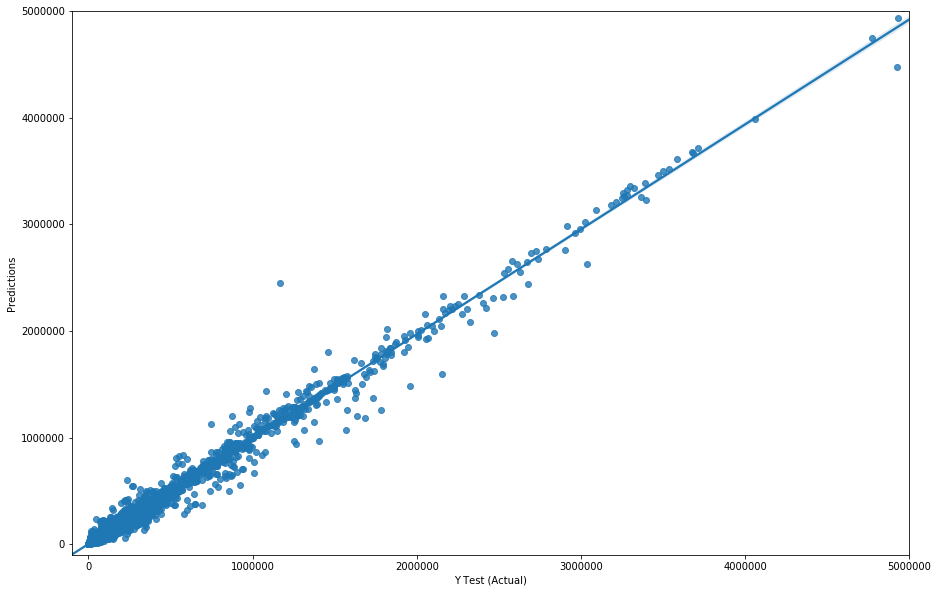

In [44]:
plt.figure(figsize=(15,10))
g = sns.regplot(y_test, y_pred, fit_reg=True)
plt.xlabel('Y Test (Actual)')
plt.ylabel('Predictions')
g.set(xlim=(-100000, 5000000),ylim=(-100000, 5000000))
plt.show(g)

In [45]:
d2 = {'True Labels' : y_test, 'Predicted Labels' : y_pred}
labels_1 = pd.DataFrame(data = d2)
print(labels_1)

       True Labels  Predicted Labels
3943         57204         55961.960
27790       379718        375120.075
2445         45182         34140.080
3555         25227         37573.910
10950         4078          4955.510
23810         1901          3630.190
14877         1064          1212.955
15003        81676         93347.095
35753         3661          4302.040
7157          4419          4406.860
10477         7670          7748.655
29497       130926        133789.215
25806         7269          7164.180
33925       233025        245525.930
37471         2752          3271.280
14748         8826         15070.195
1476         36683         35277.520
29699       399664        405815.020
20386         6398          8370.900
23717        59989         63875.645
30608       188950        186888.940
2095         37831         36437.230
35088        18060         19571.650
29384       817732        773304.785
16406        91619         64008.910
15405        36138         33654.945
6